## EE 361M Introduction to Data Mining - Assignment #2
### Group 3: Wenyang Fu, Rohan Nagar, Zuhair Parvez

## Question 1: Sampling
### 10 points

1. CBS has come up with an extreme TV show, and each of its viewers either likes or hates it. (no middle ground here; we are in a 'black and white age'). CBS wants to estimate what fraction $p$ of its audience like the show by 'randomly' calling $n$ viewers and tallying their responses so as to estimate the true value of $p$ to a fractional  accuracy of within $\pm \epsilon$%, with a confidence of $(1-\alpha) \times 100$%. For $\alpha =  0.1$, $\epsilon = 0.02$ (i.e. your answer will be $\hat{p} \pm 0.02$), what is the minimum value of $n$ needed if (i) true value $p = 0.5$ and (ii) $p = 0.95$? 
%(First try to do this yourself knowing that you have a binomial distribution, which can be approximated by a normal distribution. If you cannot, consult an undergrad stats book.)
2. Suppose for a certain value  of $p$ and choice of $\epsilon$, you calculate that you will need (at least) 1000 samples for $\alpha = 0.1$. You now decide to obtain  a more accurate answer by either (i) reducing $\alpha$ to 0.05, keeping the same $\epsilon$ or by (ii) reducing $\epsilon$ by a factor of 2 from the original value, but maintaining  $\alpha = 0.1$.  In each case how many samples would you need now?

## Question 1.1 (part i)
By the central limit theorem, $X\sim B(n, p=0.5)$ can only be approximated by a Gaussian when $n\gt30$ and $np$, $n(1-p)\gt5$. The smallest value of $n$ that will fulfill these conditions would be $31$. However, we also have to take into account the minimum number of samples we need to estimate the true proportion, denoted by the formula:

$$n\ge p(1-p) * \bigg(\frac{z_{\alpha/2}}{\epsilon}\bigg)^2$$

In this particular case, $z_{\alpha/2} \sim \pm1.65, \epsilon = .02,$ and $p=0.5$. Plugging these numbers in, we get:

$$n\ge .25 * \bigg(\frac{1.65}{.02}\bigg)^2$$
$$n\ge 1701.5625$$

Thus, the minimum number of samples we need to fulfill all conditions would be $n\ge1702$.


## Question 1.1 (part ii)
By the CLT, $X\sim B(n, p=0.95)$ can only be approximated by a Gaussian when $n\gt30$ and $np$, $n(1-p)\gt5$. The smallest value of $n$ that will fulfill these conditions would be $101$, calculated by computing $n(1-.95)\gt5$. However, we also have to take into account the minimum number of samples we need to estimate the true proportion.
In this particular case, $z_{\alpha/2} \sim \pm1.65, \epsilon = .02,$ and $p=0.95$. Then:

$$n\ge .95(1-.95) * \bigg(\frac{1.65}{.02}\bigg)^2$$
$$n\ge 323.296875$$

Thus, the minimum number of samples we need to fulfill all conditions would be $n\ge324$.

## Question 1.2 (part i)

We are given $n=1000$, $\alpha = .1$, $z_{\alpha/2}\sim1.65$

Since $\alpha$ changed to .05, $z_{\alpha/2}\sim1.96$. We must multiply both sides of our inequality by $(\frac{1.96}{1.65})^2$, which means we now need $n=1412$ samples to estimate the true proportion.

## Question 1.2 (part ii)

Since we halved our $\epsilon$, we will need to multiply both sides of our inequality by $(\frac{1}{2})^2$, which means that we now need $n=4000$ samples to estimate the true proportion.

## Question 2: Republican Presidental Debate
### 10 points

In this question we will be analyzing text data from one of the recent presidental debates. I have included code below to grab the data for you from the New York Times.

1. Create a set of the frequency of utterance of  all the distinct words spoken by candidates, and then use it to create a histogram (with 30 bins) of word counts. Thus a bin is a range of count values and the corresponding "y" value is the number of words whose count falls in this range. What is interesting about this distribution? What are the 10 most common words?
2. Remove the 100 most common words from vocabulary. Meaning that if you ever see this word, get rid of it. Now create a new python dictionary for each candidate that is a single list of all the words spoken by this candidate (ignoring these most common words). What are the 10 most common words for Trump, Rubio, and Cruz? How do their words differ?
3. Using our dictionary from number 2, how many words did each speaker speak? Who spoke the most? Who is the outlier?
4. Count the percentage of time each person uses the words (I, I'm, me, mine). When doing this convert all words to lower case. Create a bar plot of this percentage for each candidate with bars from largest to smallest. Use dictionary that has all words (doesn't exclude most common). What does the plot show?

Hints:
1. Look at python Counter.
2. Just split text on a space. This isn't perfect, but will be fine.

In [47]:
import requests
from bs4 import BeautifulSoup
from collections import defaultdict
from collections import Counter

url = 'http://www.nytimes.com/2015/11/11/us/politics/transcript-republican-presidential-debate.html'
# requests gets the source code from the url and extracts it as text
html = requests.get(url).text
# beautifulsoup is a library that takes in text source code and returns a structured format of that
# source code that you can more easily search and parse.
soup = BeautifulSoup(html, 'html5lib')
# get all the 'p' tags from the source with class = 'story-body-text'
# this was determined by looking at the source code
# the first and last paragraphs are intro and ending
paragraphs = soup('p', {'class': 'story-body-text'})[1:-1]
candidates = ['BUSH', 'TRUMP', 'RUBIO', 
              'CARSON', 'FIORINA', 'KASICH', 'CRUZ', 'PAUL']

def text_to_dict(paragraph_array):
    '''takes an array of text paragraphs from debate and returns dict 
    where key is person and value is list of text spoken by that candidate'''
    # dict is like a hash map. defaultdict lets you specify what types of values will be in your hash map
    d = defaultdict(list)
    # just a default speaker that won't end up in our returned data
    # will get replaced when an actual speaker is found
    speaker = "<START>"
    for paragraph in paragraph_array:
        words = paragraph.text.split(' ')
        first_word = words[0]
        # only new speaker when have SPEAKER: format
        if first_word[-1] == ":":
            speaker = first_word[:-1]
        # only keep candidates text
        if speaker in candidates:
            d[speaker].append(words[1:])
    return d

speaker_dict = text_to_dict(paragraphs)

## Question 2.1

[3310   47   15    7    4    2    0    0    2    2    2    0    0    2    1
    0    0    0    0    1    0    0    0    0    0    0    0    0    0    1]


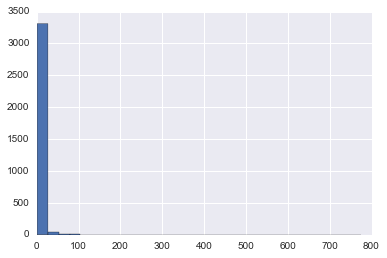

10 most common words: [('the', 775), ('to', 508), ('a', 365), ('of', 360), ('and', 352), ('we', 267), ('that', 261), ('is', 258), ('in', 254), ('I', 232)]


In [48]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

def count_words(speaker_dict):
    word_counts = Counter()
    for k,v in speaker_dict.items(): 
        # every value in speaker_dict is a nested list of lists.
        # use nested list comprehension to flatten the nested list
        words = [word for paragraph in v for word in paragraph]
        for word in words:
            word_counts[word] += 1
    return word_counts

word_counts = count_words(speaker_dict)
# Unsorted word counts, now without keys
counts = [v for k,v in word_counts.items()]
hist, bin_edges = np.histogram(counts, bins=30)
print(hist)
plt.hist(counts, bins=30)
plt.show()
print("10 most common words: {}".format(word_counts.most_common(10)))

The distribution is interesting because it is extremely long-tailed. Most words are spoken with low frequency, but a few words (mainly particles and pronouns) are spoken with extremely high frequency. The ten most common words are listed above as (word, count).

## Question 2.2

In [49]:
# 100 most common words, which we will need to remove.
top_words = [word for (word,count) in word_counts.most_common(100)]

def candidate_words_filtered(speaker_dict):
    words_by_candidate = defaultdict(list)
    for k,v in speaker_dict.items(): 
        # every value in speaker_dict is a nested list of lists.
        # use nested list comprehension to flatten the nested list
        words = [word for paragraph in v for word in paragraph]
        # Remove the 100 most common words from the list of all words
        words_no_outliers = [word for word in words if not any(outlier == word for outlier in top_words)]
#         print(len(words))
#         print(len(words_no_outliers))
        for word in words_no_outliers:
            if k in words_by_candidate:
                words_by_candidate[k].append(word)
            else:
                words_by_candidate[k] = [word]
    return words_by_candidate

words_by_candidates = candidate_words_filtered(speaker_dict)

def top_ten_words(candidate_name):
    word_counts = Counter(words_by_candidates[candidate_name])
    top_ten = word_counts.most_common(10)
    print("Candidate {}'s ten most common words are:\n{}\n".format(candidate_name, top_ten))

top_ten_words("TRUMP")
top_ten_words("RUBIO")
top_ten_words("CRUZ")


Candidate TRUMP's ten most common words are:
[('country', 10), ('come', 9), ('country.', 8), ('ever', 8), ('right', 6), ('nobody', 6), ('tell', 6), ('into', 5), ('in,', 5), ('they’re', 5)]

Candidate RUBIO's ten most common words are:
[('important', 9), ('new', 8), ('job', 8), ('ever', 8), ('most', 7), ('21st', 7), ('Americans', 6), ('This', 6), ('better', 6), ('election', 6)]

Candidate CRUZ's ten most common words are:
[('which', 9), ('economic', 9), ('Washington', 7), ('her', 7), ('tax,', 6), ('And,', 6), ('you’re', 6), ('pay', 6), ('that,', 6), ('put', 6)]



## Question 2.3

In [50]:
def candidate_word_count(candidate_name):
    return Counter(words_by_candidates[candidate_name])

candidate_counters = {name: candidate_word_count(name) for name in candidates}
most_talkative = ""
most_words = 0
for name, counter in candidate_counters.items():
    num_words_spoken = sum(counter.values())
    if num_words_spoken > most_words:
        most_words = num_words_spoken
        most_talkative = name
    print("Candidate {} spoke {} words".format(name, num_words_spoken))
print("Candidate {} spoke the most words with a count of {} words".format(most_talkative, most_words))


Candidate RUBIO spoke 1124 words
Candidate CRUZ spoke 1131 words
Candidate BUSH spoke 972 words
Candidate KASICH spoke 1099 words
Candidate TRUMP spoke 984 words
Candidate FIORINA spoke 1000 words
Candidate PAUL spoke 828 words
Candidate CARSON spoke 679 words
Candidate CRUZ spoke the most words with a count of 1131 words


All candidate's word counts are listed above. It looks like Carson is the outlier, speaking the least with only 679 words.

## Question 2.4

[('KASICH', 2.310654685494223), ('CARSON', 2.154046997389034), ('TRUMP', 2.1390374331550803), ('PAUL', 1.698886936145284), ('FIORINA', 1.600413009808983), ('RUBIO', 1.1970927746900384), ('CRUZ', 1.150483202945237), ('BUSH', 0.7272727272727273)]


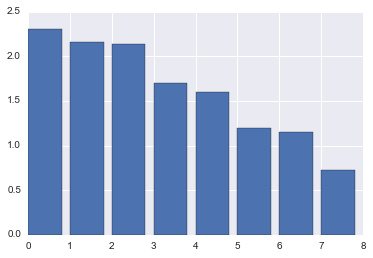

In [51]:
from __future__ import division

def candidate_words(speaker_dict):
    words_by_candidate = defaultdict(list)
    for k,v in speaker_dict.items(): 
        # every value in speaker_dict is a nested list of lists.
        # use nested list comprehension to flatten the nested list
        words = [word.lower() for paragraph in v for word in paragraph]
        for word in words:
            if k in words_by_candidate:
                words_by_candidate[k].append(word)
            else:
                words_by_candidate[k] = [word]
    return words_by_candidate

words_by_candidates = candidate_words(speaker_dict)
candidate_counters = {name: candidate_word_count(name) for name in candidates}

def narcissist_frequency(candidate_name):
    # Calculates the % of time each person uses words
    counter = candidate_counters[candidate_name]
    narcissist_words = ['i\'m', 'i', 'me', 'mine']
    narcissism_count = sum([counter[word] for word in narcissist_words])
    total_count = sum(counter.values())
    return 100* narcissism_count / total_count

# Need to print frequencies in descending order
narcissism_freq = Counter({name: narcissist_frequency(name) for name in candidates})
y_vals = [freq[1] for freq in narcissism_freq.most_common()]
print(narcissism_freq.most_common())
plt.bar(range(len(y_vals)), y_vals)
plt.show()



Kasich talks the most about himself, while Bush talks the least about himself.

## Queston 3: Principal Component Analysis
### 15 points

In this question, you will explore an application of PCA.

1. Convert your data from 2.2 to a vectorized format. This means you will have a row for each candidate and a column for each word in your data. A column for a candidate will contain the number of times that candidate used that word. Use [CountVectorizer](http://scikit-learn.org/stable/modules/feature_extraction.html) from sklearn with min_df = 1.
2. Convert your data from a sparse matrix to a dense array using .toarray() and then scale it to have mean zero and standard deviation of 1. See [here](http://scikit-learn.org/stable/modules/preprocessing.html) for help.
2. Plot the explained variance as a function of the number of PCA components (called a scree plot). Use sklearn's PCA functionality to do this.
3. Now pick the top two principal components and project the data onto the respective dimensions. Visualize the data in a scatter plot and label each point with the candidate's name. Who are the outliers? Use sklearn and matplotlib for this. 
4.  In what sense is PCA an optimal feature extraction technique? Describe a situation where you would prefer feature selection to (linear) feature extraction, even though the former  is a special case of the latter.

## Question 3.1

In [52]:
from sklearn.feature_extraction.text import CountVectorizer

candidate_word_corpus = candidate_words_filtered(speaker_dict)
candidates = candidate_word_corpus.keys()
candidate_word_corpus = [' '.join(v) for v in candidate_word_corpus.values()]

vectorizer = CountVectorizer(min_df=1)
vectorized_corpus = vectorizer.fit_transform(candidate_word_corpus)
vectorized_corpus

<8x2206 sparse matrix of type '<class 'numpy.int64'>'
	with 4385 stored elements in Compressed Sparse Row format>

## Question 3.2

In [53]:
from sklearn import preprocessing

vectorized_corpus_array = vectorized_corpus.toarray()
vectorized_corpus_array = preprocessing.scale(vectorized_corpus_array)
vectorized_corpus_array

/Users/rohannagar/anaconda/lib/python3.5/site-packages/sklearn/utils/validation.py:420: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


array([[-1.15470054, -1.08711461,  0.94387981, ..., -0.37796447,
        -0.76249285, -0.37796447],
       [ 1.15470054,  1.58885982,  0.94387981, ..., -0.37796447,
        -0.76249285, -0.37796447],
       [ 0.57735027,  0.2508726 , -0.13483997, ..., -0.37796447,
         0.45749571,  2.64575131],
       ..., 
       [-0.57735027, -1.08711461, -1.21355975, ...,  2.64575131,
        -0.15249857, -0.37796447],
       [ 0.        , -0.41812101, -1.21355975, ..., -0.37796447,
         2.28747855, -0.37796447],
       [-1.15470054,  1.58885982,  0.94387981, ..., -0.37796447,
        -0.76249285, -0.37796447]])

## Question 3.3

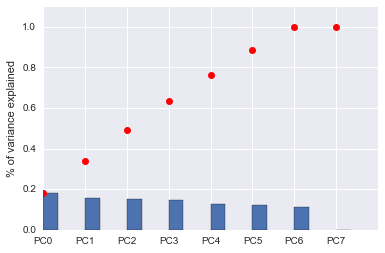

In [54]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(vectorized_corpus_array)

fig, ax = plt.subplots()
individual = ax.bar(np.arange(8), pca.explained_variance_ratio_, width=0.35)

pca_explained_variance_cumulative = np.cumsum(pca.explained_variance_ratio_)
cumulative = ax.plot(np.arange(8), pca_explained_variance_cumulative, 'ro')
ax.axis([0, 8, 0, 1.1])
ax.set_ylabel('% of variance explained')
_ = ax.set_xticklabels(['PC'+str(i) for i in range(8)])

## Question 3.4

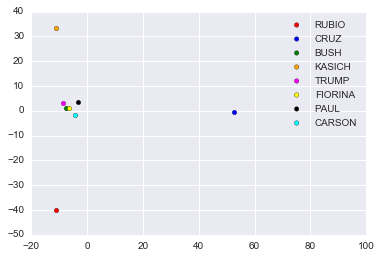

In [55]:
pca_n_2 = PCA(n_components=2)
projected_corpus_array = pca_n_2.fit(vectorized_corpus_array).transform(vectorized_corpus_array)
colors = ['red', 'blue', 'green', 'orange', 'magenta', 'yellow', 'black', 'cyan']

plt.figure()
plt.axis([-20, 100, -50, 40])
for color, index, candidate in zip(colors, range(8), candidates):
    plt.scatter(projected_corpus_array[index, 0], projected_corpus_array[index, 1], c=color, label=candidate)
_ = plt.legend()

Kasich, Rubio, and Cruz appear to be outliers in this projection.

## Question 3.5

## Question 4: Robust Regression
### 5 points

In this question we will be exploring using a regression technique that is more robust to outliers. I provide some code below that injects outlier points into the original medv and lstat data from the housing dataset. This problem looks into how robust regression can help in the presence of outliers.

1. Using the original data, plot lstat on the x-axis and log(medv) on the y-axis of a scatter plot with the line of best fit from a linear regression on the plot as well. Do the same, but with the data that includes the outlier values. What changes with the best fit line? Specifically, how does the slope change?
2. Now run a linear regression with a Huber loss on the data including the outliers and create the same plot as above, but this time with the fit from the Huber loss regression (using all the data). What has changed (comment on the slope as well)? Note: Use SGDRegressor from sklearn with 500 iterations and no penalty.
3. Explain why the huber loss is more robust to outliers.

Note:  Use plot's with xlim = (-5, 40) and ylim = (1, 5). These set the range for the x any y axes.

In [56]:
import pandas as pd
import numpy as np

housing_data = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data",
                   delim_whitespace=True, header=None,
                   names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO',
                           'B', 'LSTAT', 'MEDV'])
housing_data = housing_data.dropna()
lstat = housing_data.LSTAT.values
medv = housing_data.MEDV.values
medv_std = np.std(medv)
lstat_std = np.std(lstat)
np.random.seed(42)
medv_outliers = np.random.normal(1, 1, 5)
lstat_outliers = np.random.normal(1, 1, 5)
medv_with_outliers = np.append(medv, medv_outliers)
lstat_with_outliers = np.append(lstat, lstat_outliers)

## Question 4.1

lstat coefficient: -0.046080433787184086


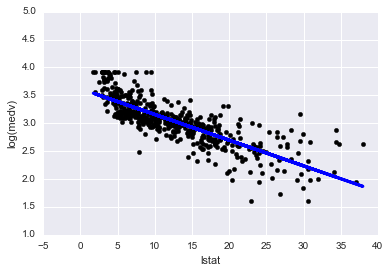

In [57]:
from sklearn import linear_model

lmedv = np.log(medv) # LOG of medv
lstat = lstat.reshape(-1, 1)
lmedv = lmedv.reshape(-1, 1)

regr = linear_model.LinearRegression()
regr.fit(lstat, lmedv)
print('lstat coefficient: {}'.format(np.squeeze(regr.coef_)))

# Plot lstat on x-axis, log(medv) on y-axis, and best fit line in blue
plt.scatter(lstat, lmedv, color='black')
plt.plot(lstat, regr.predict(lstat), color='blue', linewidth=3)
plt.xlim(-5, 40)
plt.ylim(1, 5)
plt.xlabel('lstat')
plt.ylabel('log(medv)')
sns.despine()

lstat coefficient: -0.03923744514148939


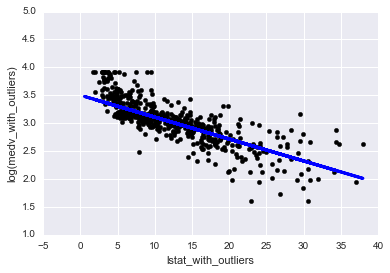

In [58]:
lmedv_with_outliers = np.log(medv_with_outliers) # LOG of medv_with_outliers
lstat_with_outliers = lstat_with_outliers.reshape(-1, 1)
lmedv_with_outliers = lmedv_with_outliers.reshape(-1, 1)

regr = linear_model.LinearRegression()
regr.fit(lstat_with_outliers, lmedv_with_outliers)
print('lstat coefficient: {}'.format(np.squeeze(regr.coef_)))

# Plot lstat on x-axis, log(medv) on y-axis, and best fit line in blue
plt.scatter(lstat_with_outliers, lmedv_with_outliers, color='black')
plt.plot(lstat_with_outliers, regr.predict(lstat_with_outliers), color='blue', linewidth=3)
plt.xlim(-5, 40)
plt.ylim(1, 5)
plt.xlabel('lstat_with_outliers')
plt.ylabel('log(medv_with_outliers)')
sns.despine()

With the outliers, the best fit line starts closer to when lstat is 0. It also starts lower on the y-axis, to account for those outliers below. Additionally, the slope is not as steep in the one with outliers as in the one without the outliers.

## Question 4.2

lstat coefficient: -0.043581031013116216


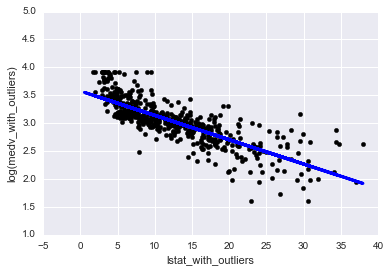

In [59]:
lmedv_with_outliers = lmedv_with_outliers.ravel()

regr = linear_model.SGDRegressor(loss='huber', penalty='none', n_iter=500)
regr.fit(lstat_with_outliers, lmedv_with_outliers)
print('lstat coefficient: {}'.format(np.squeeze(regr.coef_)))

# Plot lstat on x-axis, log(medv) on y-axis, and huber loss line in blue
plt.scatter(lstat_with_outliers, lmedv_with_outliers, color='black')
plt.plot(lstat_with_outliers, regr.predict(lstat_with_outliers), color='blue', linewidth=3)
plt.xlim(-5, 40)
plt.ylim(1, 5)
plt.xlabel('lstat_with_outliers')
plt.ylabel('log(medv_with_outliers)')
sns.despine()

We can see that the best fit line is much better, even with the outliers. The slope of this best fit line is closer to the slope of the best fit without outliers.

## Question 4.3

With standard linear regression, we use squared loss $r^2$ for all data points. Huber loss is different because it is a weighted version of normal linear regression. It uses the squared error function for smaller residuals, and a linear error function $(|r|)$ for larger residuals. The error function becomes linear since the small residuals have a weight of 1 and the larger residuals have a weight proportional to $\frac{1}{|r|}$.

# Question 5: Visualization using Bokeh
## 10 points

In this problem, you'll build an interactive visualization. Bokeh is a Python interactive visualization library that targets modern web browsers for presentation. For more information on Bokeh, see http://bokeh.pydata.org/en/latest/. The problem statement is as follows:

Using the [auto-mpg](http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data-original) data, your goal is to build a Bokeh visualization which allows the user explore how MPG varies with horsepower and weight. You will create a visualization that allows the user to toggle the Y axis of a scatter plot between horsepower and weight. With the x-axis always being MPG.

Hints: 
1. You can make use of Select widgets.
2. See: http://bokeh.pydata.org/en/latest/docs/user_guide/interaction.html#javascript-callbacks. Specifically look at the CustomJS for Widgets under Callbacks and the Select widget. 
3. See: http://bokeh.pydata.org/en/latest/docs/reference/plotting.html. Look for the scatter API.
4. See: http://bokeh.pydata.org/en/0.10.0/docs/user_guide/styling.html#labels. For labeling axes.
5. Use output_notebook() from Bokeh to output the plot to your notebook

We have made available a sample screenshot of our Bokeh app that supports the above requirements. Your interface should look similar to the screenshots.